Residency- 4 : Unsupervised Learning
Assignment : project 2

In [424]:
#Lets add libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [425]:
#Lets import the data first
dfCars = pd.read_csv("vehicle-1.csv")

In [426]:
dfCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [427]:
dfCars.shape

(846, 19)

In [428]:
dfCars.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

# 1) Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [429]:
#Lets check if there are any duplicate records
duplicate = dfCars.duplicated()
print(duplicate.sum())

0


In [430]:
dfCars.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

The output shown above suggests that there are null values in multiple features.

In [431]:
dfCars1 = dfCars

# In order to impute missing/null values in above fatures,
- Lets first drop all rows from data set having missing/null values.
- Then using pairplot check the distribution of of each fature (which has null values) for each category (car, van and bus)
- If the distribution looks approximately normal then we can take mean of value of that category (car or bus or van) and impute into missing value for that row (if row is for car then mean value of car set, if row is for bus then mean value of bus and so on)
- This way we will be able to preserve nature of distribution

In [432]:
df = dfCars1.dropna()

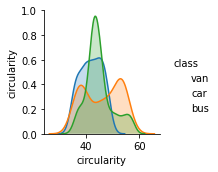

In [433]:
sns.pairplot(pd.DataFrame(df[['circularity','class']]), hue='class', diag_kind='kde')

In [434]:
df.skew()

compactness                    0.386048
circularity                    0.272723
distance_circularity           0.114244
radius_ratio                   0.396129
pr.axis_aspect_ratio           3.832899
max.length_aspect_ratio        6.698420
scatter_ratio                  0.596913
elongatedness                  0.053941
pr.axis_rectangularity         0.759483
max.length_rectangularity      0.271183
scaled_variance                0.629144
scaled_variance.1              0.822734
scaled_radius_of_gyration      0.266943
scaled_radius_of_gyration.1    2.156717
skewness_about                 0.782756
skewness_about.1               0.671462
skewness_about.2               0.255880
hollows_ratio                 -0.229941
dtype: float64

In [435]:
df.kurtosis()

compactness                    -0.511370
circularity                    -0.921232
distance_circularity           -0.967083
radius_ratio                    0.320925
pr.axis_aspect_ratio           29.574346
max.length_aspect_ratio        56.652717
scatter_ratio                  -0.633279
elongatedness                  -0.871370
pr.axis_rectangularity         -0.423033
max.length_rectangularity      -0.761519
scaled_variance                 0.086776
scaled_variance.1              -0.249523
scaled_radius_of_gyration      -0.532440
scaled_radius_of_gyration.1    12.030034
skewness_about                  0.126053
skewness_about.1               -0.173589
skewness_about.2               -0.577569
hollows_ratio                  -0.787775
dtype: float64

In [436]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['circularity'].mean(), # dataframe having no null values
                                    dfCars1['circularity']
                                )

In [437]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['circularity'].mean(),
                                    dfCars1['circularity']
                                )

In [438]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['circularity'].mean(),
                                    dfCars1['circularity']
                                )

In [439]:
df[df['class']=='van']['circularity'].mean()

42.00512820512821

In [440]:
pd.DataFrame(dfCars1['circularity']).head(6)

circularity
0    48.000000
1    41.000000
2    50.000000
3    41.000000
4    44.000000
5    44.892683

In [441]:
dfCars1[(dfCars1['circularity'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

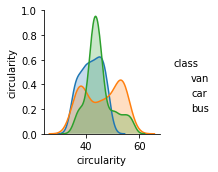

In [442]:
sns.pairplot(pd.DataFrame(dfCars1[['circularity','class']]), hue='class', diag_kind='kde')

In [443]:
dfCars1.skew()

compactness                    0.381271
circularity                    0.261701
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [444]:
dfCars1.kurtosis()

compactness                    -0.535275
circularity                    -0.911035
distance_circularity           -0.977287
radius_ratio                    0.304921
pr.axis_aspect_ratio           29.889135
max.length_aspect_ratio        58.375455
scatter_ratio                  -0.616570
elongatedness                  -0.866601
pr.axis_rectangularity         -0.390508
max.length_rectangularity      -0.770098
scaled_variance                 0.120071
scaled_variance.1              -0.203819
scaled_radius_of_gyration      -0.496336
scaled_radius_of_gyration.1    11.455759
skewness_about                  0.094077
skewness_about.1               -0.144728
skewness_about.2               -0.588758
hollows_ratio                  -0.813435
dtype: float64

Above steps varifies that data ic correctly imputed as expected or as per step we expect

In [445]:
#Let do this for other feature

In [446]:
dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

In [447]:
dfCars1[(dfCars1['distance_circularity'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [448]:
dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

In [449]:
dfCars1[(dfCars1['radius_ratio'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [450]:
dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

In [451]:
dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

In [452]:
dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

In [453]:
dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

In [454]:
dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

In [455]:
dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

In [456]:
dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

In [457]:
dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

In [458]:
dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

In [459]:
dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

In [460]:
dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

In [461]:
dfCars1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

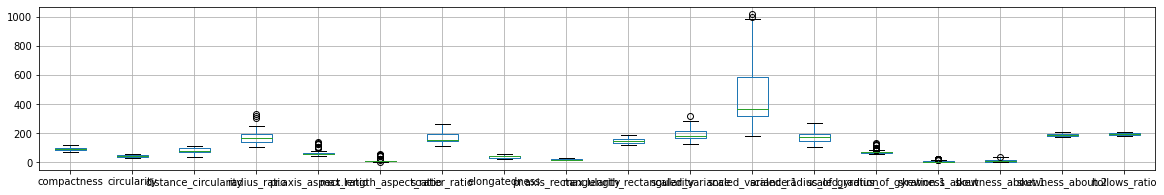

In [462]:
#Lets check Outliers using box plot
dfCars1.boxplot(figsize=(20,3))

Above box plot shows outliers in 8 fatures- radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2

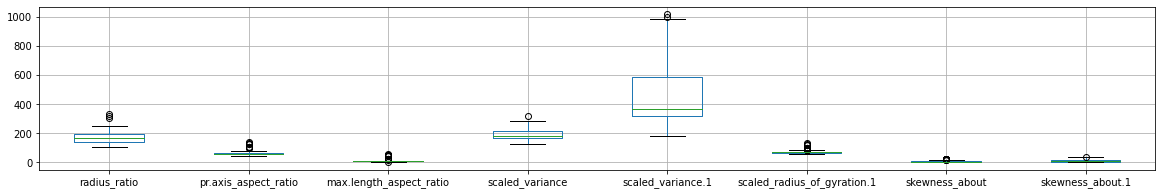

In [463]:
dfCars1[['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 
        'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']].boxplot(figsize=(20,3))


In [464]:
#Lets impute values for outliers

In [465]:
dfCars1.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.830556             82.079830    168.899003   
std       8.234474     6.134095             15.747503     33.417319   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.680640                 8.567376     168.916293   
std                7.882488                 4.601217      33.197874   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.930306               20.581066                 147.998818   
std         7.812193                2.589473                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.624273         439.643098                 174.721392   
std          31.370133         176.484290                  32.547108   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         364.000000                 174.000000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.444131        6.358384         12.605467   
std                       7.471479        4.904574          8.931247   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        846.000000     846.000000  
mean         188.920197     195.632388  
std            6.152197       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

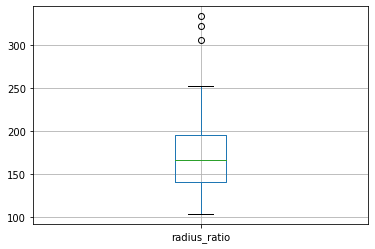

In [466]:
dfCars1[['radius_ratio']].boxplot()

In [467]:
dfCars1_backup = dfCars1

In [468]:
dfCars1['radius_ratio'] = np.where((dfCars1['radius_ratio'] > 250) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['radius_ratio'].mean(),
                                   dfCars1['radius_ratio'])

dfCars1['radius_ratio'] = np.where((dfCars1['radius_ratio'] > 250) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['radius_ratio'].mean(),
                                   dfCars1['radius_ratio'])

dfCars1['radius_ratio'] = np.where((dfCars1['radius_ratio'] > 250) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['radius_ratio'].mean(),
                                   dfCars1['radius_ratio'])


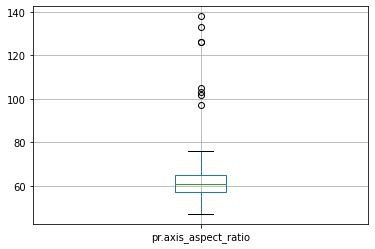

In [469]:
dfCars1[['pr.axis_aspect_ratio']].boxplot()

In [470]:
dfCars1['pr.axis_aspect_ratio'] = np.where((dfCars1['pr.axis_aspect_ratio'] > 80) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['pr.axis_aspect_ratio'].mean(),
                                   dfCars1['pr.axis_aspect_ratio'])

dfCars1['pr.axis_aspect_ratio'] = np.where((dfCars1['pr.axis_aspect_ratio'] > 80) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['pr.axis_aspect_ratio'].mean(),
                                   dfCars1['pr.axis_aspect_ratio'])

dfCars1['pr.axis_aspect_ratio'] = np.where((dfCars1['pr.axis_aspect_ratio'] > 80) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['pr.axis_aspect_ratio'].mean(),
                                   dfCars1['pr.axis_aspect_ratio'])

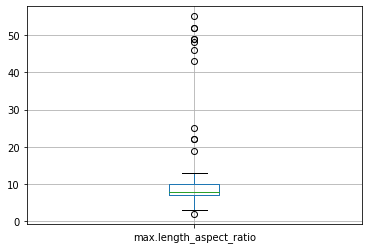

In [471]:
dfCars1[['max.length_aspect_ratio']].boxplot()

In [472]:
dfCars1['max.length_aspect_ratio'] = np.where((dfCars1['max.length_aspect_ratio'] > 18) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['max.length_aspect_ratio'].mean(),
                                   dfCars1['max.length_aspect_ratio'])

dfCars1['max.length_aspect_ratio'] = np.where((dfCars1['max.length_aspect_ratio'] > 18) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['max.length_aspect_ratio'].mean(),
                                   dfCars1['max.length_aspect_ratio'])

dfCars1['max.length_aspect_ratio'] = np.where((dfCars1['max.length_aspect_ratio'] > 18) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['max.length_aspect_ratio'].mean(),
                                   dfCars1['max.length_aspect_ratio'])

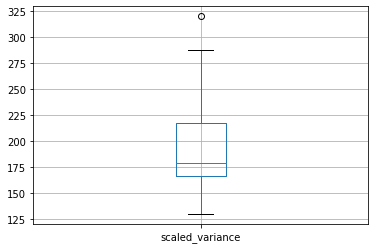

In [473]:
dfCars1[['scaled_variance']].boxplot()

In [474]:
dfCars1['scaled_variance'] = np.where((dfCars1['scaled_variance'] > 300) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['scaled_variance'].mean(),
                                   dfCars1['scaled_variance'])

dfCars1['scaled_variance'] = np.where((dfCars1['scaled_variance'] > 300) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['scaled_variance'].mean(),
                                   dfCars1['scaled_variance'])

dfCars1['scaled_variance'] = np.where((dfCars1['scaled_variance'] > 300) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['scaled_variance'].mean(),
                                   dfCars1['scaled_variance'])

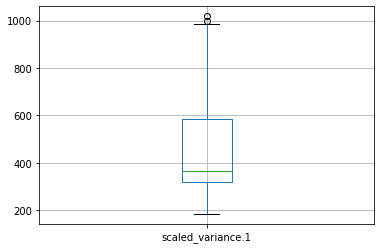

In [475]:
dfCars1[['scaled_variance.1']].boxplot()

In [476]:
dfCars1['scaled_variance.1'] = np.where((dfCars1['scaled_variance.1'] > 990) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['scaled_variance.1'].mean(),
                                   dfCars1['scaled_variance.1'])

dfCars1['scaled_variance.1'] = np.where((dfCars1['scaled_variance.1'] > 990) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['scaled_variance.1'].mean(),
                                   dfCars1['scaled_variance.1'])

dfCars1['scaled_variance.1'] = np.where((dfCars1['scaled_variance.1'] > 990) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['scaled_variance.1'].mean(),
                                   dfCars1['scaled_variance.1'])

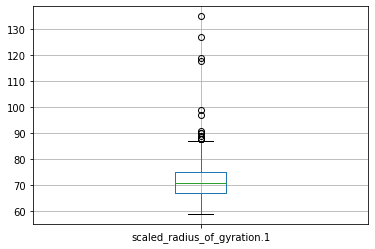

In [477]:
dfCars1[['scaled_radius_of_gyration.1']].boxplot()

In [478]:
dfCars1['scaled_radius_of_gyration.1'] = np.where((dfCars1['scaled_radius_of_gyration.1'] > 87) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['scaled_radius_of_gyration.1'].mean(),
                                   dfCars1['scaled_radius_of_gyration.1'])

dfCars1['scaled_radius_of_gyration.1'] = np.where((dfCars1['scaled_radius_of_gyration.1'] > 87) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['scaled_radius_of_gyration.1'].mean(),
                                   dfCars1['scaled_radius_of_gyration.1'])

dfCars1['scaled_radius_of_gyration.1'] = np.where((dfCars1['scaled_radius_of_gyration.1'] > 87) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['scaled_radius_of_gyration.1'].mean(),
                                   dfCars1['scaled_radius_of_gyration.1'])

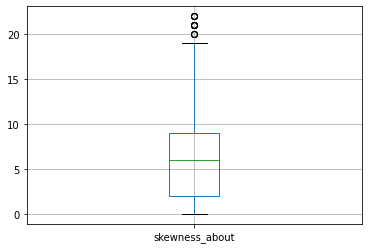

In [479]:
dfCars1[['skewness_about']].boxplot()

In [480]:
dfCars1['skewness_about'] = np.where((dfCars1['skewness_about'] > 19) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['skewness_about'].mean(),
                                   dfCars1['skewness_about'])

dfCars1['skewness_about'] = np.where((dfCars1['skewness_about'] > 19) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['skewness_about'].mean(),
                                   dfCars1['skewness_about'])

dfCars1['skewness_about'] = np.where((dfCars1['skewness_about'] > 19) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['skewness_about'].mean(),
                                   dfCars1['skewness_about'])

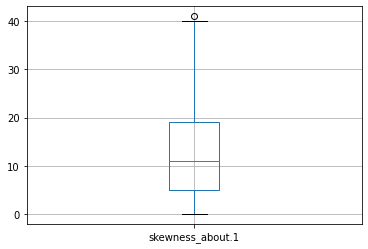

In [481]:
dfCars1[['skewness_about.1']].boxplot()

In [482]:
dfCars1['skewness_about.1'] = np.where((dfCars1['skewness_about.1'] > 38) & (dfCars1['class']=='van'), 
                                   df[df['class']=='van']['skewness_about.1'].mean(),
                                   dfCars1['skewness_about.1'])

dfCars1['skewness_about.1'] = np.where((dfCars1['skewness_about.1'] > 38) & (dfCars1['class']=='bus'), 
                                   df[df['class']=='bus']['skewness_about.1'].mean(),
                                   dfCars1['skewness_about.1'])

dfCars1['skewness_about.1'] = np.where((dfCars1['skewness_about.1'] > 38) & (dfCars1['class']=='car'), 
                                   df[df['class']=='car']['skewness_about.1'].mean(),
                                   dfCars1['skewness_about.1'])

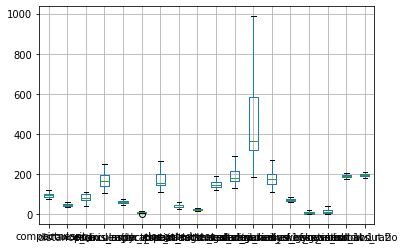

In [483]:
dfCars1.boxplot()

Outliers fixing is done

# Imputation is complete

# 2) Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

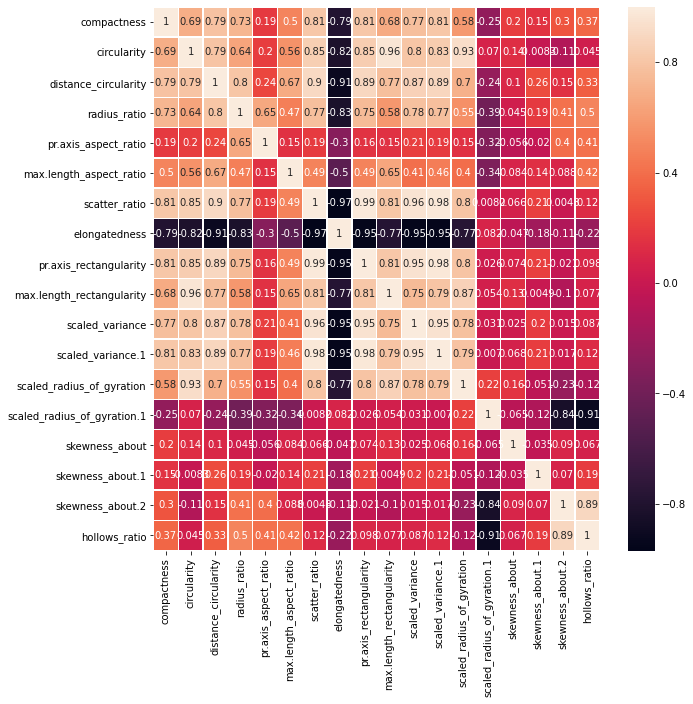

In [484]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(dfCars1.corr(), annot=True, linewidths=.5, ax=ax)

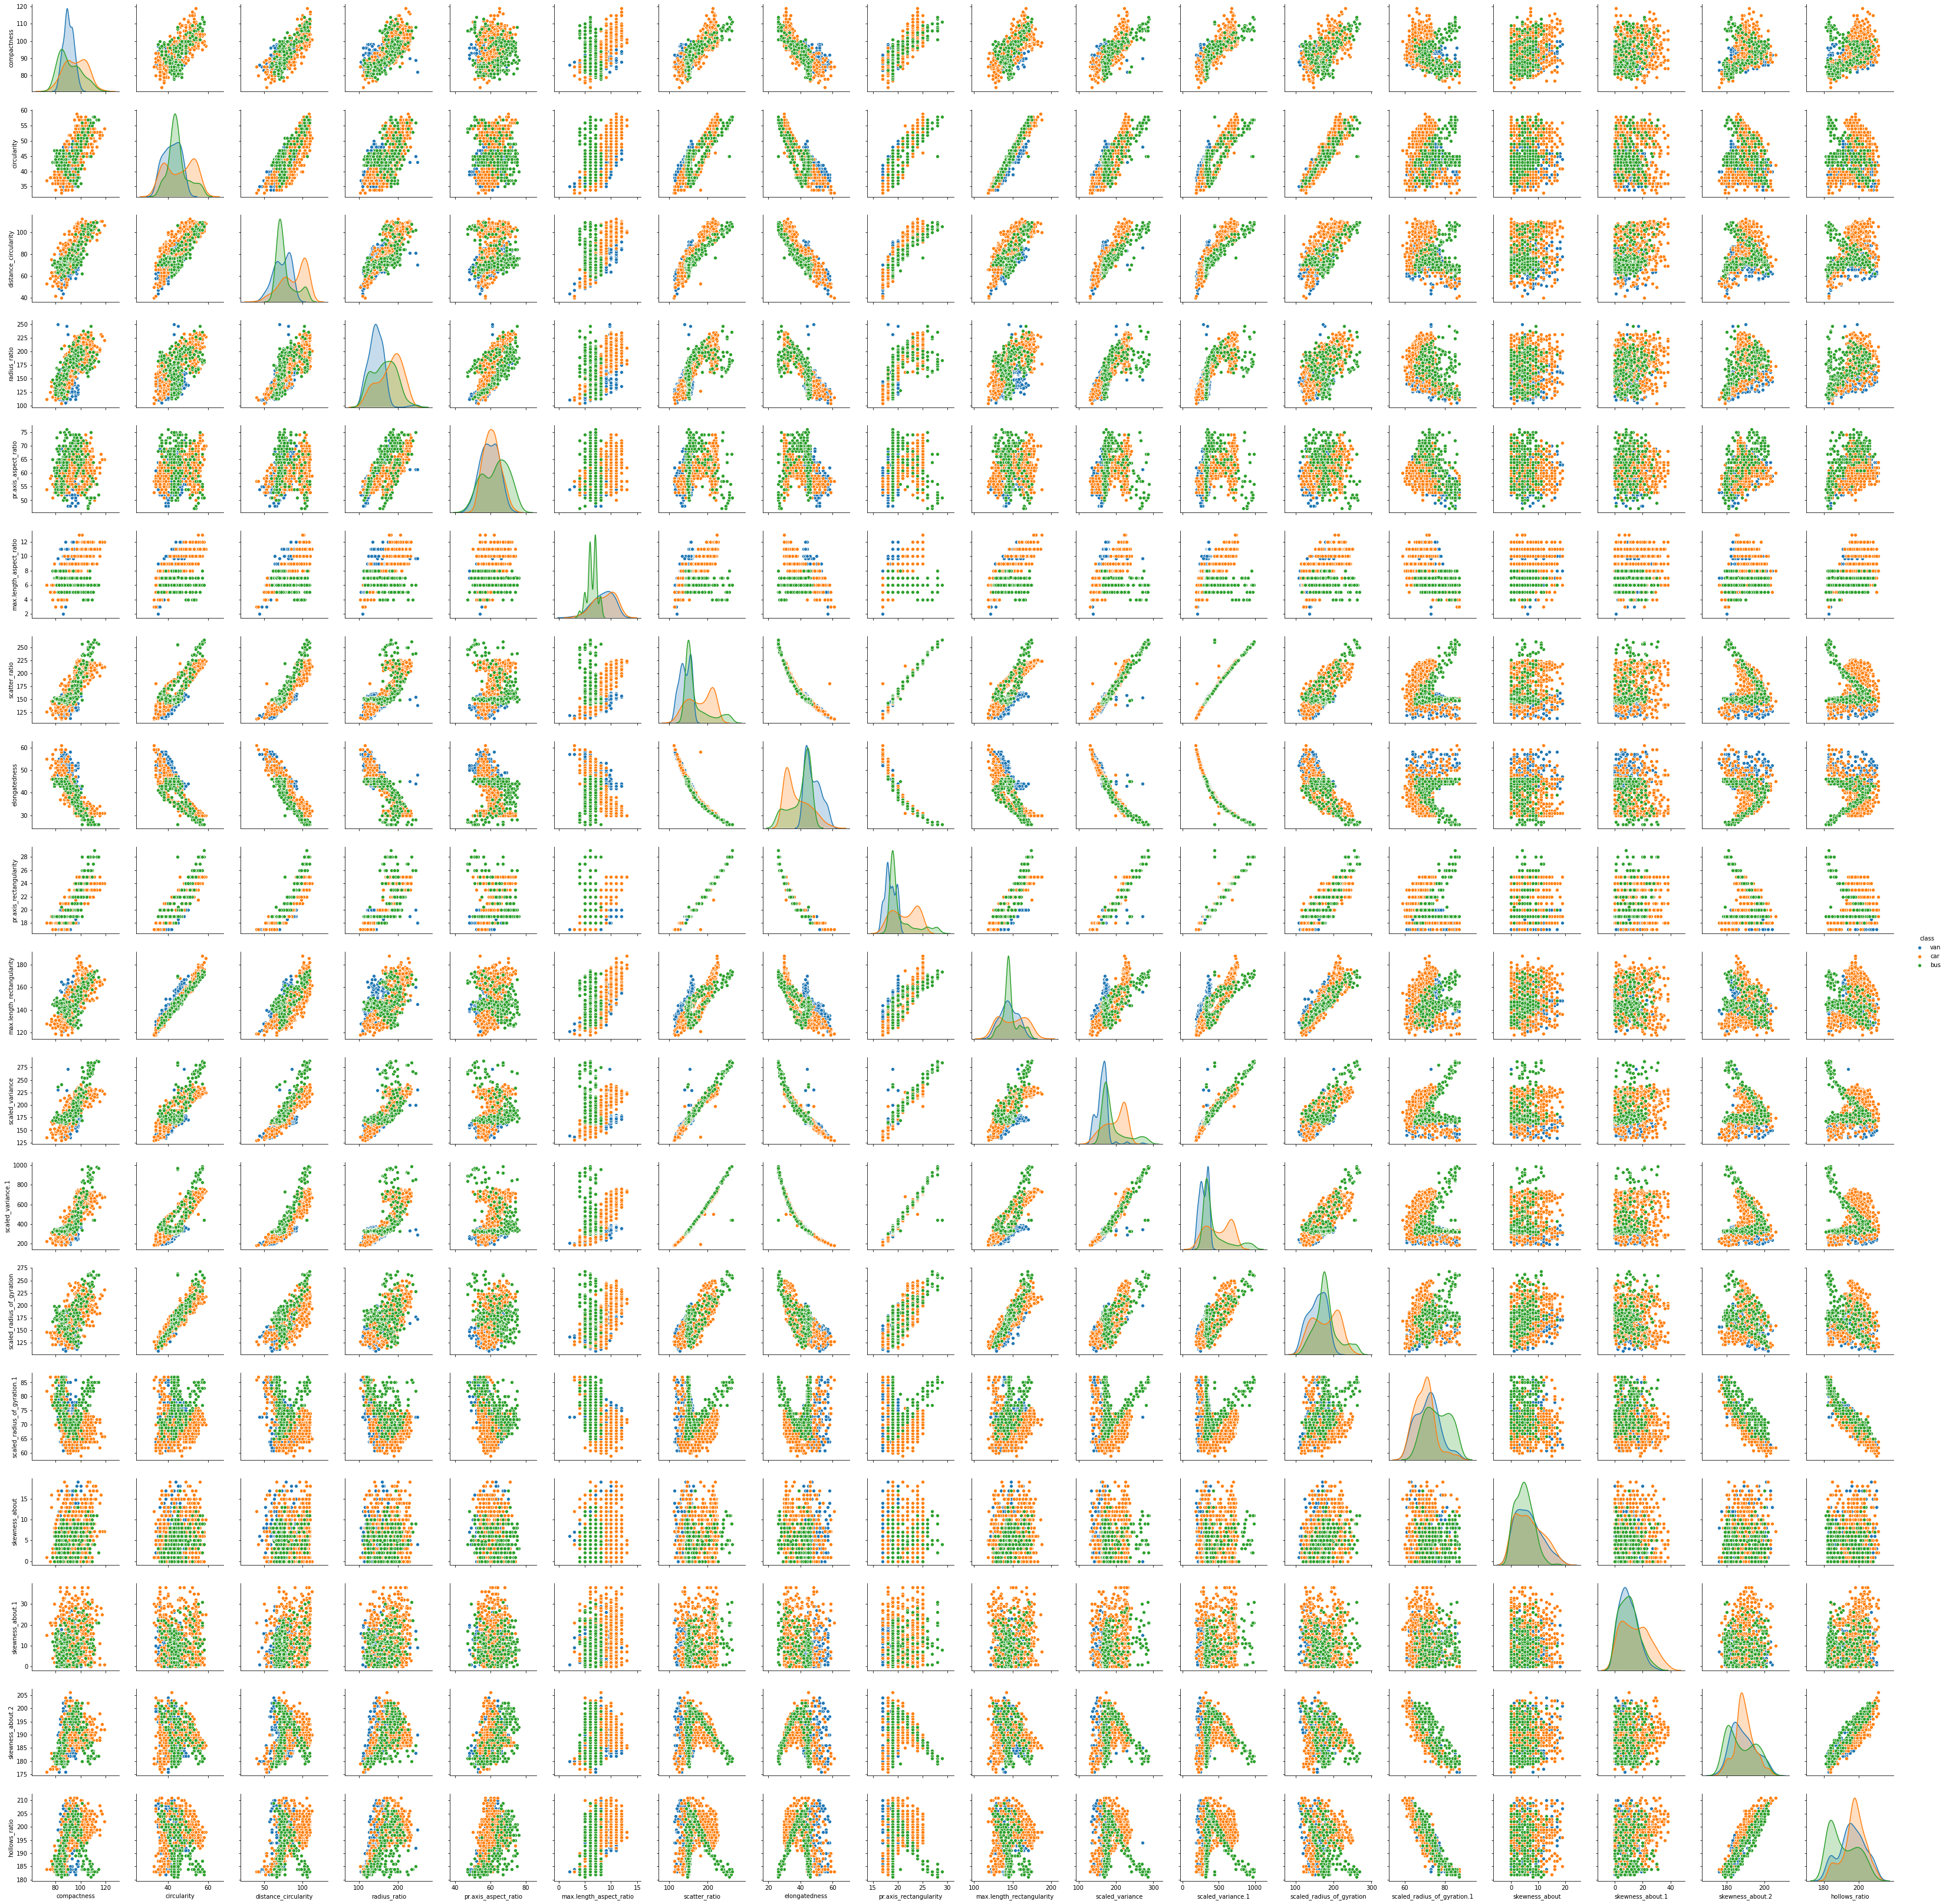

In [485]:
sns.pairplot(dfCars1, hue='class', diag_kind='kde')

Understanding Attributes - Based on heat map and pairplot shown above.

1) If we go through diagonallly in pair plot, most of the features do not give clear distinction for 3 
   categories (van, bus, car) of distribution. Few features like scaled_variance, scaled_varinace.1, 
   pr.axis_rectangularity, elongatedness, scatter_ratio, max_lenght_aspect_ratio are able to, to some extent,
   distinguish between 2 classes.
2) Heat map and pair plot shows 
  a) There is strong corelationship between compactness, circularity, distance_circularity, radius_ation
     max.lenght_aspect_ratio, scatter_ratio, pr.axis_rectangularity, max.length_reactangularity,   
     scaled_variance, scaled_variance.1, scaled_radius_of_gyration
  b) Elongatedness - has strong -ve corelationship with compactness, circularity, distance_circularity, radius_ation
     max.lenght_aspect_ratio, scatter_ratio,, max.length_reactangularity, scaled_variance, 
     scaled_variance.1, scaled_radius_of_gyration 

# 3) Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [486]:
dfCars1_bck = dfCars1

In [487]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [488]:
target = dfCars1['class']
features = dfCars1.drop(['class'],axis=1)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, 
                                                    test_size=0.3, random_state=10)

# 4) Train a Support vector machine using the train set and get the accuracy on the test set

In [490]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
ScoreDetails ={}
Count =1

In [491]:
#Lets see what linear SVM model gives
svm_model = SVC(C=0.1, kernel='linear', gamma=1)
svm_model.fit(X_train, y_train)

var1= "Accuracy on test data - Linear SVM model - Wihtout Scaling -> "
var2= str(accuracy_score(y_test,svm_model.predict(X_test)))
print(var1 + var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Linear SVM model - Wihtout Scaling -> 0.9566929133858267


In [492]:
print(confusion_matrix(y_test,svm_model.predict(X_test)))

[[ 61   3   1]
 [  3 124   2]
 [  1   1  58]]


In [493]:
#Lets use non linear models
svm_model1 = SVC(kernel='rbf')
svm_model1.fit(X_train, y_train)

var1 = "Accuracy on test data - Kernel(rbf) based- Without scaling ->"
var2=  str(accuracy_score(y_test,svm_model1.predict(X_test)))
print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Kernel(rbf) based- Without scaling ->0.5118110236220472


/home/amol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [494]:
print(confusion_matrix(y_test,svm_model1.predict(X_test)))

[[  0  65   0]
 [  0 129   0]
 [  0  59   1]]


In [495]:
svm_model2  = SVC(kernel='poly')
svm_model2.fit(X_train, y_train)

var1= "Accuracy on test data- Kernel(poly) based SVM model-Without scaling -> "
var2= str(accuracy_score(y_test,svm_model2.predict(X_test)))
print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data- Kernel(poly) based SVM model-Without scaling -> 0.9448818897637795


/home/amol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [496]:
print(confusion_matrix(y_test,svm_model2.predict(X_test)))

[[ 62   2   1]
 [  2 124   3]
 [  2   4  54]]


In [497]:
svm_model3  = SVC(kernel='sigmoid')
svm_model3.fit(X_train, y_train)

var1="Accuracy on test data - Kernal(sigmod) based SVM model - Without Scaling ->" 
var2= str(accuracy_score(y_test,svm_model3.predict(X_test)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Kernal(sigmod) based SVM model - Without Scaling ->0.5078740157480315


/home/amol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [498]:
print(confusion_matrix(y_test,svm_model3.predict(X_test)))

[[  0  65   0]
 [  0 129   0]
 [  0  60   0]]


In [499]:
#Lets apply sclaing for training and test data and check the results
from sklearn.preprocessing import StandardScaler

In [500]:
sc = StandardScaler()

In [501]:
X_train_normal = sc.fit_transform(X_train)

In [502]:
X_test_normal = sc.transform(X_test)

In [503]:
normal_svm_model1 = SVC(C=2, kernel='linear', gamma=1)
normal_svm_model1.fit(X_train_normal, y_train)

var1 = "Accuracy on test data - Linear SVM model-Scaled data -> " 
var2= str(accuracy_score(y_test,normal_svm_model1.predict(X_test_normal)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Linear SVM model-Scaled data -> 0.952755905511811


In [504]:
print(confusion_matrix(y_test,normal_svm_model1.predict(X_test_normal)))

[[ 60   5   0]
 [  2 126   1]
 [  1   3  56]]


In [505]:
#Lets use non linear models
normal_svm_model2 = SVC(kernel='rbf')
normal_svm_model2.fit(X_train_normal, y_train)

var1= "Accuracy on test data - Kernel(rbf) based SVM model-Scaled data -> "
var2= str(accuracy_score(y_test,normal_svm_model2.predict(X_test_normal)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Kernel(rbf) based SVM model-Scaled data -> 0.9566929133858267


In [506]:
print(confusion_matrix(y_test,normal_svm_model2.predict(X_test_normal)))

[[ 63   1   1]
 [  1 127   1]
 [  2   5  53]]


It is observed that after scaling data, SVC model (kernel = rbf) is giving huge performance gain (from 50% to 95 %)  

# 5) Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [507]:
from sklearn.decomposition import PCA

In [508]:
pca_model = PCA(n_components=18)

In [509]:
pca_model.fit(X_train_normal)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [510]:
pcascaledXtrain_allcomp = pca_model.fit_transform(X_train_normal)


In [511]:
pcascaledXtest_allcomp =pca_model.transform(X_test_normal)

In [512]:
x_pca.shape

(592, 18)

In [513]:
pca_model.components_

array([[ 2.73683703e-01,  2.87586081e-01,  3.00601032e-01,
         2.73624533e-01,  1.02708115e-01,  1.90596018e-01,
         3.10255383e-01, -3.08889075e-01,  3.06432919e-01,
         2.79245033e-01,  3.01341501e-01,  3.05515867e-01,
         2.63056765e-01, -3.77812742e-02,  2.70995545e-02,
         6.20820999e-02,  3.53498102e-02,  7.82522420e-02],
       [-7.63644955e-02,  1.18198120e-01, -5.34923098e-02,
        -1.95018426e-01, -2.57880840e-01, -1.29390488e-01,
         7.98869284e-02, -1.42363446e-02,  9.35022870e-02,
         1.08887411e-01,  8.28717853e-02,  7.51845641e-02,
         2.02479126e-01,  5.08326325e-01, -3.40671154e-02,
        -6.77103184e-02, -5.01223342e-01, -5.09894002e-01],
       [ 7.63274901e-02,  1.92811951e-01, -3.39797746e-02,
        -1.20614778e-01, -1.08881512e-01,  1.93852572e-01,
        -9.62043092e-02,  1.00192058e-01, -8.94876172e-02,
         2.15663754e-01, -1.38494242e-01, -1.00052373e-01,
         1.90808031e-01, -7.76313459e-02,  6.55581924e

In [514]:
pca_model.explained_variance_

array([9.80285256e+00, 3.37745709e+00, 1.21942833e+00, 1.13443398e+00,
       8.79382376e-01, 6.42111715e-01, 3.21971482e-01, 2.16344735e-01,
       1.20810835e-01, 7.64003168e-02, 6.27691985e-02, 4.62484595e-02,
       3.23700258e-02, 3.03079970e-02, 2.61877985e-02, 2.00980650e-02,
       1.79104568e-02, 3.37143088e-03])

In [515]:
pca_model.explained_variance_ratio_

array([5.43682983e-01, 1.87319551e-01, 6.76315824e-02, 6.29176503e-02,
       4.87720518e-02, 3.56126148e-02, 1.78570895e-02, 1.19988493e-02,
       6.70037568e-03, 4.23729234e-03, 3.48128719e-03, 2.56501873e-03,
       1.79529704e-03, 1.68093339e-03, 1.45242013e-03, 1.11467309e-03,
       9.93344589e-04, 1.86985328e-04])

In [516]:
print("Total variance - " + str((pca_model.explained_variance_).sum()))

Total variance - 18.030456852791865


In [517]:
print("95 % of Total variance - " + str((pca_model.explained_variance_).sum()*0.95))

95 % of Total variance - 17.12893401015227


In [518]:
((pca_model.explained_variance_)[:7]).sum()

17.377637534276115

In [519]:
((pca_model.explained_variance_)[:7])

array([9.80285256, 3.37745709, 1.21942833, 1.13443398, 0.87938238,
       0.64211171, 0.32197148])

First 7 components capture 95 % of the variance

In [520]:
#Lets create PCA model considering only 7 components 
pca_model_new = PCA(n_components=7)

In [521]:
pca_model_new.fit(X_train_normal)
pcascaledXtrain = pca_model_new.fit_transform(X_train_normal)

In [522]:
pcascaledXtest=pca_model_new.transform(X_test_normal)

In [523]:
pca_model_new.components_

array([[ 0.2736837 ,  0.28758608,  0.30060103,  0.27362453,  0.10270812,
         0.19059602,  0.31025538, -0.30888908,  0.30643292,  0.27924503,
         0.3013415 ,  0.30551587,  0.26305676, -0.03778127,  0.02709955,
         0.0620821 ,  0.03534981,  0.07825224],
       [-0.0763645 ,  0.11819812, -0.05349231, -0.19501843, -0.25788084,
        -0.12939049,  0.07988693, -0.01423634,  0.09350229,  0.10888741,
         0.08287179,  0.07518456,  0.20247913,  0.50832632, -0.03406712,
        -0.06771032, -0.50122334, -0.509894  ],
       [ 0.07632749,  0.19281195, -0.03397977, -0.12061478, -0.10888151,
         0.19385257, -0.09620431,  0.10019206, -0.08948762,  0.21566375,
        -0.13849424, -0.10005237,  0.19080803, -0.07763135,  0.65558192,
        -0.55884726,  0.048054  ,  0.04489924],
       [ 0.10607183, -0.06771686,  0.12887606, -0.23211849, -0.61195847,
         0.2704444 ,  0.02158616,  0.04552505,  0.04616652,  0.01710604,
        -0.03339671,  0.01202384, -0.12275146, -0.102

In [524]:
pca_model_new.explained_variance_

array([9.80285256, 3.37745709, 1.21942833, 1.13443398, 0.87938238,
       0.64211171, 0.32197148])

In [525]:
pca_model_new.explained_variance_ratio_

array([0.54368298, 0.18731955, 0.06763158, 0.06291765, 0.04877205,
       0.03561261, 0.01785709])

# 6) Train a Support vector machine using the Principal Components and get the accuracy on the test set

In [526]:
# PCA components involcinf 7 components only
pca_svm_model = SVC(C=1, kernel='linear')
pca_svm_model.fit(pcascaledXtrain, y_train)

var1= "Accuracy on test data - Linear SVM model-using 7 PCA Components -> " 
var2= str(accuracy_score(y_test,pca_svm_model.predict(pcascaledXtest)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Linear SVM model-using 7 PCA Components -> 0.8267716535433071


In [527]:
# PCA components involcinf 7 components only
#Lets use non linear models
pca_svm_model1 = SVC(kernel='rbf')
pca_svm_model1.fit(pcascaledXtrain, y_train)
var1= "Accuracy on test data - Kernel(rbf) based SVM model-using 7 PCA Components-> "
var2= str(accuracy_score(y_test,pca_svm_model1.predict(pcascaledXtest)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Kernel(rbf) based SVM model-using 7 PCA Components-> 0.937007874015748


/home/amol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [528]:
# PCA components involving all 18 components
pca_svm_model11 = SVC(C=1, kernel='linear')
pca_svm_model11.fit(pcascaledXtrain_allcomp, y_train)

var1= "Accuracy on test data - Linear SVM model-using all PCA Components -> " 
var2= str(accuracy_score(y_test,pca_svm_model11.predict(pcascaledXtest_allcomp)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Linear SVM model-using all PCA Components -> 0.9409448818897638


In [529]:
# PCA components involving all 18 components
#Lets use non linear models
pca_svm_model12 = SVC(kernel='rbf')
pca_svm_model12.fit(pcascaledXtrain_allcomp, y_train)
var1= "Accuracy on test data - Kernel(rbf) based SVM model-using all PCA Components -> " 
var2= str(accuracy_score(y_test,pca_svm_model12.predict(pcascaledXtest_allcomp)))

print(var1+ var2)
ScoreDetails[Count]=var1 + var2
Count=Count+1

Accuracy on test data - Kernel(rbf) based SVM model-using all PCA Components -> 0.9566929133858267


# 7) Compare the accuracy scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings

In [530]:
for i in ScoreDetails :
    print(ScoreDetails[i])

Accuracy on test data - Linear SVM model - Wihtout Scaling -> 0.9566929133858267
Accuracy on test data - Kernel(rbf) based- Without scaling ->0.5118110236220472
Accuracy on test data- Kernel(poly) based SVM model-Without scaling -> 0.9448818897637795
Accuracy on test data - Kernal(sigmod) based SVM model - Without Scaling ->0.5078740157480315
Accuracy on test data - Linear SVM model-Scaled data -> 0.952755905511811
Accuracy on test data - Kernel(rbf) based SVM model-Scaled data -> 0.9566929133858267
Accuracy on test data - Linear SVM model-using 7 PCA Components -> 0.8267716535433071
Accuracy on test data - Kernel(rbf) based SVM model-using 7 PCA Components-> 0.937007874015748
Accuracy on test data - Linear SVM model-using all PCA Components -> 0.9409448818897638
Accuracy on test data - Kernel(rbf) based SVM model-using all PCA Components -> 0.9566929133858267


Above details show, accurancy of SVM models using 
 1) raw data (without scaling)
 2) Scaled data 
 3) Using Principal Components

# Conclusions

# 1)SVM model (kernel based) if uses scaled data gives better accuracy (from 51.18 % to 95.66 %)

# 2) There is not significat improvement if we use principal components as before using principal components we can get accurancy of 95.27 % (Linear SVM model - scaled data

# 3) Probably we may have to use tunning methods like grid search etc...to try different possible hyper parameters and check accuracy score 